# Tree, Bagging, Boosting

everything will be scored manually instead of using gradder

why?

because the scoring will be based how you implement split for Decision Tree, how you decide what data to feed to Decision Tree in Random Forest, etc

If you have any question regrading this particular assignment feel free to email muhammad51@ui.ac.id


**you can edit, add, remove any part of code here as long as you doesnt change the class and method name**

**you are also allowed to add new parameter and or variables**

**the only library that you are allowed to use is numpy and matplotlib**

# Table Of Content

* [Decision Tree](#Implement-a-Decision-Tree-for-regression-and-classification-purpose)
    * [Decision Tree for Regression](#Decision-Tree-for-Regression-(Score:-2)) (Score:2)
    * [Decision Tree for Classification](#Decision-Tree-for-Classification-(Score:-2)) (Score:2)
* [Random Forest](#Implement-a-Random-Forest-for-regression-and-classification-purpose)
    * [fit](#Implement-a-fit-(train)-method-for-RandomForest-(Score:-1)) (Score:1)
    * [RandomForestClassifier](#Implement-a-predict-probability-method-for-RandomForestClassifier-(Score:-1)) (Score:1)
    * [RandomForestRegressor](#Implement-a-predict-method-for-RandomForestRegressor-(Score:-1)) (score:1)
* [Gradient Boosted Tree Regressor](#Implement-a-Gradient-Boosted-Tree-For-Regression) (score:3)
* [Essay](#Essay-Question-(you-can-answer-either-in-Bahasa-Indonesia/English))
    * [Explain-the-differences-of-RF-and-GBDT-in-term-of-performance-and-how-they-works-(score:1)](#Explain-the-differences-of-RF-and-GBDT-in-term-of-performance-and-how-they-works-(score:1)) (score:1)
    * [when-will-you-choose-RF-over-GBDT,-and-when-will-you-choose-GBDT-over-RF?-why?-(score:1)](#when-will-you-choose-RF-over-GBDT,-and-when-will-you-choose-GBDT-over-RF?-why?-(score:1)) (score:1)

In [23]:
#put your npm as string below
NPM = "1606882540"

#if someone that also take an ML class this year help you doing this assingment,put his/her NPM as list of string below
COLLABORATORS = []

#if youre using external sources please put its link as list of string below
SOURCES = ["https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d",
          "https://explained.ai/gradient-boosting/L2-loss.html",
          "https://sefiks.com/2018/10/04/a-step-by-step-gradient-boosting-decision-tree-example/",
          "https://sefiks.com/2018/08/28/a-step-by-step-regression-decision-tree-example/",
          "https://sefiks.com/2018/08/27/a-step-by-step-cart-decision-tree-example/"]

# Implement a Decision Tree for regression and classification purpose

you also have to implement min_samples_split and max_depth parameter as regularizer 

you can add more method to help you implement your tree

* max_depth

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

* min_samples_split

The minimum number of samples required to split an internal node

your score mostly will be based on how you make split (is it fast? is it choose a considerably good split point?)

don't forget to provide a brief explanation of what your code does

In [24]:
from matplotlib import pyplot as plt
import numpy as np

## Decision Tree for Regression (Score: 2)

In [25]:
class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
    
    def fit(self, X, y):
        # YOUR CODE HERE
        self.root = self.__create_dt(X,y,0)
        
    def predict(self, X):
        # YOUR CODE HERE
        pred_res = [self.root.evaluate(x) for x in X]
        return pred_res
        
    def __create_dt(self,X,y, depth):
        #kondisi ketika cabang pada decision tree harus dibatasi
        if depth == self.max_depth or len(X) < self.min_samples_split or np.var(y) < 1e-5:
            leaf = Leaf(np.mean(y))
            return leaf
        
        total_cols = len(X[0])
        midpoint_dict = {}
        best_stdred_glob = None #stdred = standard deviation reduction
        best_mid_glob = None
        best_col_idx = None
        curr_std = np.std(y)
        #memilih kolom dengan standard deviation reduction terbesar
        for col_idx in range(total_cols):
            best_stdred_loc = None
            best_mid_loc = None
            #kondisi ketika kolom bertipe numerik
            if np.issubdtype(X[:,col_idx].dtype, np.number):
                sorted_data = X[X[:,col_idx].argsort()]
                midpoint = []
                for row_idx in range(len(sorted_data)-1):
                    midpoint.append((sorted_data[row_idx][col_idx]+sorted_data[row_idx+1][col_idx])/2)
                #looping memilih midpoint dengan standard deviation reduction terbesar dalam 1 kolom
                for m in midpoint:
                    lte = []
                    gt  = []

                    total_lte = 0
                    total_gt = 0
                    for row_idx,row_val in enumerate(X[:,col_idx]):
                        if(row_val <= m):
                            lte.append(row_val)
                            total_lte += 1

                        else:
                            gt.append(row_val)
                            total_gt += 1

                    lte = np.array(lte)
                    gt = np.array(gt)
                    #weighted standard deviation dalam 1 midpoint
                    weighted_std = (total_lte/(total_lte + total_gt))*np.std(lte) + (total_gt/(total_lte + total_gt))*np.std(gt)
                    if best_stdred_loc is None or (curr_std-weighted_std) < best_stdred_loc:
                        best_stdred_loc = curr_std-weighted_std
                        best_mid_loc = m
                        
            else: #kondisi ketika kolom bertipe kategorikal
                row_names = np.unique(X[:,col_idx])
                count_row_names = {}
                total_data = len(X[:,col_idx])
                for rn in row_names:
                    rd = X[X[:,col_idx] == rn]
                    count_row_names[rn] = len(rd)
                
                weighted_std = 0
                for rn in map_row_data:
                    weighted_std += (count_row_names[rn]/total_data)*np.std(y[X[:,col_idx] == rn])
                
                best_stdred_loc = curr_std-weighted_std
            
            if best_stdred_glob is None or (best_stdred_loc < best_stdred_glob):
                best_stdred_glob = best_stdred_loc
                best_mid_glob = best_mid_loc
                best_col_idx = col_idx
                
        if(np.issubdtype(X[:,best_col_idx].dtype,np.number)):   
            left = self.__create_dt(X[X[:,col_idx] <= best_mid_glob], y[X[:,col_idx] <= best_mid_glob], depth+1)
            right = self.__create_dt(X[X[:,col_idx] > best_mid_glob], y[X[:,col_idx] > best_mid_glob], depth+1)
            node = NodeContinuous(best_col_idx, best_mid_glob, left, right)
            return node
        
        else:
            row_names = X[:,best_col_idx]
            map_child_nodes = {}
            for rn in row_names:
                map_child_nodes[rn] = self.__create_dt(X[X[:,best_col_idx] == rn], y[X[:,best_col_idx] == rn])
            node = NodeDiscrete(best_col_idx, map_child_nodes)
            return node
            
class NodeContinuous:
    def __init__(self, column_idx, threshold, left, right):
        self.column_idx = column_idx
        self.threshold = threshold
        self.left = left
        self.right = right
        
    def evaluate(self,x):
        return self.left.evaluate(x) if x[self.column_idx] <= self.threshold else self.right.evaluate(x)
    
class NodeDiscrete:
    def __init__(self, column_idx, map_child_nodes):
        self.column_idx = column_idx
        self.map_child_nodes = map_child_nodes
    
    def evaluate(self,x):
        col_name = x[self.column_idx]
        return self.map_child_nodes[col_name].evaluate(x)
    
class Leaf:
    def __init__(self,value):
        self.value = value
    
    def evaluate(self,x):
        return self.value

### some test case that you might need

True


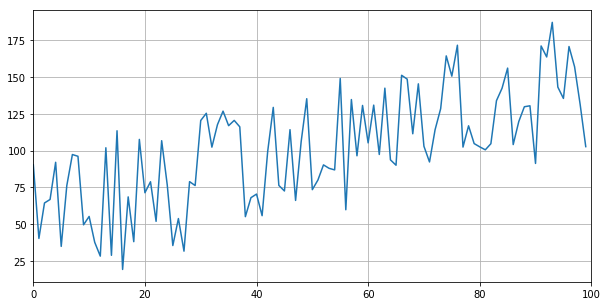

In [26]:
regression_data = np.arange(100)
np.random.seed(2019)
delta = np.random.uniform(0,100, size=(100,))
regression_label =  regression_data + delta
plt.figure(figsize=(10,5))
plt.plot(regression_data,regression_label)
plt.xlim(0,100)
print(np.issubdtype(regression_data.dtype,np.number))
plt.grid()

In [27]:
dt = DecisionTreeRegressor()
dt.fit(regression_data.reshape(-1,1), regression_label)

# if trained till pure your tree should be able to predict perfectly if your tree already see all the data
np.testing.assert_almost_equal(dt.predict(regression_data.reshape(-1,1)), regression_label)

In [28]:
# lets create our artifical train test split

x_train_reg = regression_data[np.where(np.arange(100)%4 != 0)[0]]
y_train_reg = regression_label[np.where(np.arange(100)%4 != 0)[0]]
x_test_reg = regression_data[np.where(np.arange(100)%4 == 0)[0]]
y_test_reg = regression_label[np.where(np.arange(100)%4 == 0)[0]]

#### if your implementation is correct you should see that the line aligned for most point

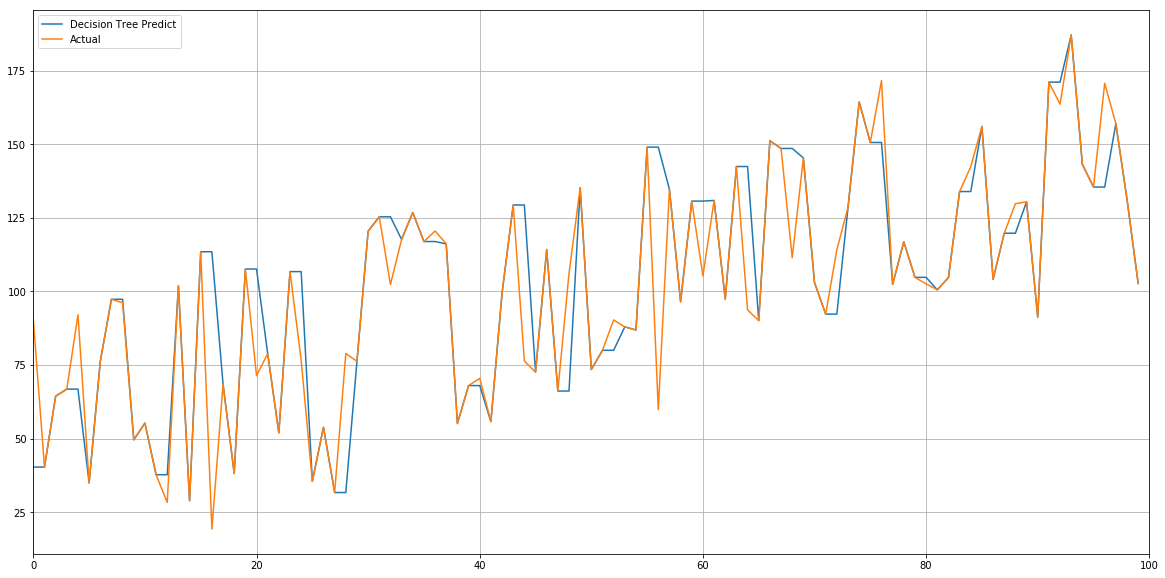

In [29]:
dt = DecisionTreeRegressor()
dt.fit(x_train_reg.reshape(-1,1), y_train_reg)

plt.figure(figsize=(20,10))
plt.plot(regression_data, dt.predict(regression_data.reshape(-1,1)), regression_data, regression_label)
plt.xlim(0,100)
plt.grid()
plt.legend(['Decision Tree Predict', 'Actual'], loc='best')

## Decision Tree for Classification (Score: 2)

In [30]:
class DecisionTreeClassifier:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        
    def fit(self, X, y):
        # YOUR CODE HERE
        self.root = self.__create_dt(X,y,0)
        
    def predict_proba(self, X):
        # YOUR CODE HERE
        probs = []
        for x in X:
            probs.append(self.root.evaluate(x))
        return probs
    
    def predict(self, X):
        # YOUR CODE HERE
        pred_res = []
        for pred_list in self.predict_proba(X):
            prob_max = -1
            label_max = -1
            for pred in pred_list:
                if(pred[1] > prob_max):
                    prob_max = pred[1]
                    label_max = pred[0]
            pred_res.append(label_max)
        return pred_res
    
    def __create_dt(self,X,y,depth):
        #base case
        if depth == self.max_depth or len(np.unique(y)) == 1 or len(X) < self.min_samples_split:
            probs = []
            for lbl in np.unique(y):
                prob_lbl = len(y[y == lbl])/len(y)
                probs.append([lbl,prob_lbl])
            return Leaf(probs)
        
        total_cols = len(X[0])
        midpoint_dict = {}
        best_gini_glob = None
        best_mid_glob = None
        best_col_idx = None
        #looping untuk memilih kolom dengan gini value terendah
        for col_idx in range(total_cols):
            best_gini_loc = None
            best_mid_loc = None
            if np.issubdtype(X[:,col_idx].dtype, np.number):
                sorted_data = X[X[:,col_idx].argsort()]
                midpoint = []
                for row_idx in range(len(sorted_data)-1):
                    midpoint.append((sorted_data[row_idx][col_idx]+sorted_data[row_idx+1][col_idx])/2)
                #looping memilih midpoint dengan gini value terendah dalam 1 kolom
                for m in midpoint:
                    lte = []
                    gt  = []

                    count_lbl_lte = {}
                    count_lbl_gt = {}

                    total_lte = 0
                    total_gt = 0
                    for row_idx,row_val in enumerate(X[:,col_idx]):
                        if(row_val <= m):
                            lte.append(row_val)
                            lbl = y[row_idx]
                            if lbl not in count_lbl_lte:
                                count_lbl_lte[lbl] = 1
                            else:
                                count_lbl_lte[lbl] += 1
                            total_lte += 1

                        else:
                            gt.append(row_val)
                            lbl = y[row_idx]
                            if lbl not in count_lbl_gt:
                                count_lbl_gt[lbl] = 1
                            else:
                                count_lbl_gt[lbl] += 1
                            total_gt += 1

                    gini_lte = 1
                    for lbl in count_lbl_lte:
                        gini_lte -= (count_lbl_lte[lbl]/total_lte)**2


                    gini_gt = 1
                    for lbl in count_lbl_gt:
                        gini_gt -= (count_lbl_gt[lbl]/total_gt)**2


                    gini_mid = (total_lte/(total_lte+total_gt))*gini_lte + (total_gt/(total_lte+total_gt))*gini_gt
                    if best_gini_loc is None or gini_mid < best_gini_loc:
                        best_gini_loc = gini_mid
                        best_mid_loc = m
            
            else:
                row_names = np.unique(X[:,best_col_idx])
                gini_values = {}
                count_names = {}
                total_data = len(X[:,best_col_idx])
                for rn in row_names:
                    count_lbl = {}
                    gini_val = 1
                    rd_y = y[X[:,best_col_idx] == rn]
                    total_data_per_name = len(rd_y)
                    for lbl in rd_y:
                        if lbl not in count_lbl:
                            count_lbl[lbl] = 1
                        else:
                            count_lbl[lbl] += 1
                    
                    for lbl in count_lbl:
                        gini_val -= (count_lbl[lbl]/total_data_per_name)**2
                    
                    gini_values[rn] = gini_val
                    count_names[rn] = total_data_per_name
                    
                gini = 0
                for rn in count_names:
                    gini += (count_names[rn]/total_data)*gini_values[rn]
                    
                best_gini_loc = gini
                
            if best_gini_glob is None or best_gini_loc < best_gini_glob:
                best_gini_glob = best_gini_loc
                best_mid_glob = best_mid_loc
                best_col_idx = col_idx
                
        if np.issubdtype(X[:,best_col_idx].dtype, np.number):
            left = self.__create_dt(X[X[:,best_col_idx] <= best_mid_glob], y[X[:,best_col_idx] <= best_mid_glob], depth+1)
            right = self.__create_dt(X[X[:,best_col_idx] > best_mid_glob], y[X[:,best_col_idx] > best_mid_glob], depth+1)
            node = NodeContinuous(best_col_idx, best_mid_glob, left,right)
            return node
        
        else:
            row_names = X[:,best_col_idx]
            map_child_nodes = {}
            for rn in row_names:
                map_child_nodes[rn] = self.__create_dt(X[X[:,best_col_idx] == rn], y[X[:,best_col_idx] == rn])
            node = NodeDiscrete(best_col_idx, map_child_nodes)
            return node
                
class NodeContinuous:
    def __init__(self, column_idx, threshold, left, right):
        self.column_idx = column_idx
        self.threshold = threshold
        self.left = left
        self.right = right
        
    def evaluate(self,x):
        return self.left.evaluate(x) if x[self.column_idx] <= self.threshold else self.right.evaluate(x)
    
class NodeDiscrete:
    def __init__(self, column_idx, map_child_nodes):
        self.column_idx = column_idx
        self.map_child_nodes = map_child_nodes
    
    def evaluate(self,x):
        col_name = x[self.column_idx]
        return self.map_child_nodes[col_name].evaluate(x)
    
class Leaf:
    def __init__(self,value):
        self.value = value
    
    def evaluate(self,x):
        return self.value

### some test case that you might need

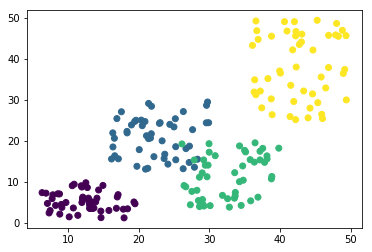

In [31]:
np.random.seed(2)
x1 = np.hstack([np.random.uniform(10*(i%4+0.6),10*(i%4+2), size=(50,)) for i in range(4)])
np.random.seed(3)
x2 = np.hstack([np.random.uniform(5*(i%2+0.2)*(i%4+1),5*(i%2+1)*(i%4+2), size=(50,)) for i in range(4)])
c = np.array([0 if i < 50 else 1 if i < 100 else 2 if i < 150 else 3 for i in range(200)])
classification_data = np.vstack([x1, x2]).T
coba = np.array([[7,8,9],[1,2,3],[4,5,6]])
classification_label = c
plt.scatter(x1, x2, c=c)
plt.show()

#### if your implementation is correct you should see that your DT able to perfectly predict each class correctly

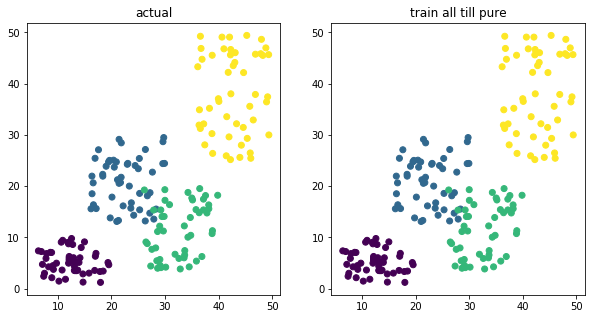

In [32]:
dt = DecisionTreeClassifier()
dt.fit(classification_data, classification_label)
np.testing.assert_almost_equal(dt.predict(classification_data), classification_label)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(x1, x2, c=c)
plt.title('actual')
plt.subplot(122)
plt.scatter(classification_data[:,0], classification_data[:,1], c=dt.predict(classification_data))
plt.title('train all till pure')
plt.show()

## train val split

In [33]:
x_val_clf = classification_data[np.where(np.arange(200)%3 != 0)[0]]
y_val_clf = classification_label[np.where(np.arange(200)%3 != 0)[0]]
x_train_clf = classification_data[np.where(np.arange(200)%3 == 0)[0]]
y_train_clf = classification_label[np.where(np.arange(200)%3 == 0)[0]]

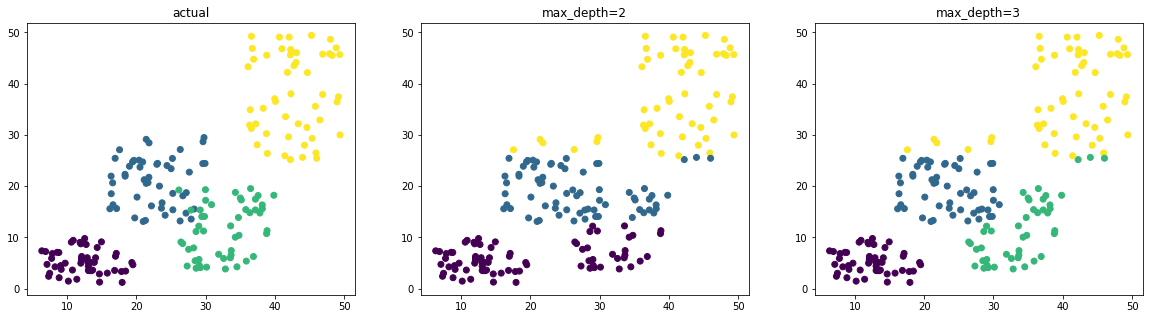

In [34]:
dt1 = DecisionTreeClassifier(max_depth=2)
dt1.fit(x_train_clf, y_train_clf)
dt2 = DecisionTreeClassifier(max_depth=3)
dt2.fit(x_train_clf, y_train_clf)
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.scatter(x1, x2, c=c)
plt.title('actual')
plt.subplot(132)
plt.scatter(classification_data[:,0], classification_data[:,1], c=dt1.predict(classification_data))
plt.title('max_depth=2')
plt.subplot(133)
plt.scatter(classification_data[:,0], classification_data[:,1], c=dt2.predict(classification_data))
plt.title('max_depth=3')
plt.show()

# Implement a Random Forest for regression and classification purpose

## Implement a fit (train) method for RandomForest (Score: 1)

provide a brief explanation of what your code does

your score mostly will be based on the way you split your data to fit your trees

**please make sure that you use random_state  if it is not None so that your RF is always produce the same result for the same input**

In [35]:
class RandomForest:
    def __init__(self, model_used, max_depth=None, min_samples_split=2, n_trees=10, random_state=None):
        self.model_used = model_used
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.random_state = random_state
        self.n_trees = n_trees
        self.trees = []
        self.used_columns = []
    
    def fit(self, X, y):
        # YOUR CODE HERE
        np.random.seed(self.random_state)
        
        X_len = len(X)
        for idx_tr in range(self.n_trees):
            selected_random_nof = np.random.choice(range(1,len(X[0])+1),1)
            selected_feat_idx = np.random.choice(range(len(X[0])), selected_random_nof, replace=False) #memilih index kolom secara random
            self.used_columns.append(selected_feat_idx)

            selected_row_idx = np.random.choice(list(range(X_len)), size = X_len, replace=True) #memilih index baris secara random with replacement
            
            selected_row = []
            selected_label = []
            for row_idx in selected_row_idx:
                selected_row.append(X[row_idx])
                selected_label.append(y[row_idx])
                
            selected_row = np.array(selected_row)

            selected_data = []
            for feat_idx in selected_feat_idx:
                selected_data.append(selected_row[:,feat_idx])
            selected_data = np.array(selected_data)
            selected_label = np.array(selected_label)
            
            selected_data = np.vstack(selected_data).T
            
            dt = self.model_used(max_depth = self.max_depth, min_samples_split = self.min_samples_split)
            dt.fit(selected_data, selected_label)
            self.trees.append(dt)
    
        return self.trees

## Implement a predict probability method for RandomForestClassifier (Score: 1)

provide a brief explanation of what your code does

scoring will be based on how you implement the predict_proba itself

In [36]:
class RandomForestClassifier(RandomForest):
    def __init__(self, *args, **kwargs):
        super().__init__(DecisionTreeClassifier, *args, **kwargs)
    
    def predict_proba(self, X):
        # YOUR CODE HERE
        pred_probs = []
        count_lbl = {}
        total_count_lbl = len(self.trees)
        for idx_row in range(len(X)):
            count_lbl[idx_row] = {}
            
        for selected_feat_idx,tr in zip(self.used_columns,self.trees):
            selected_data = []
            for feat_idx in selected_feat_idx:
                selected_data.append(X[:,feat_idx])
            selected_data = np.array(selected_data)
            selected_data = np.vstack(selected_data).T
            
            list_lbl = tr.predict(selected_data)
            for idx_row,lbl in enumerate(list_lbl):
                if lbl not in count_lbl[idx_row]:
                    count_lbl[idx_row][lbl] = 1
                else:
                    count_lbl[idx_row][lbl] += 1
        
        for idx_row in count_lbl:
            pred_prob = []
            for lbl in count_lbl[idx_row]:
                pred_prob.append(np.array([lbl,count_lbl[idx_row][lbl]/total_count_lbl]))
            pred_prob = np.array(pred_prob) #pred_prob berisi list of (pred_class, pred_prob)
            pred_probs.append(pred_prob)
            
        pred_probs = np.array(pred_probs)
        return pred_probs

    def predict(self, X):
        # YOUR CODE HERE
        pred_lbl = []
        for pred_prob in self.predict_proba(X):
            pred_lbl.append(pred_prob[pred_prob[:,1].argsort()][-1][0]) #memilih label dengan probabilitas tertinggi
        return pred_lbl

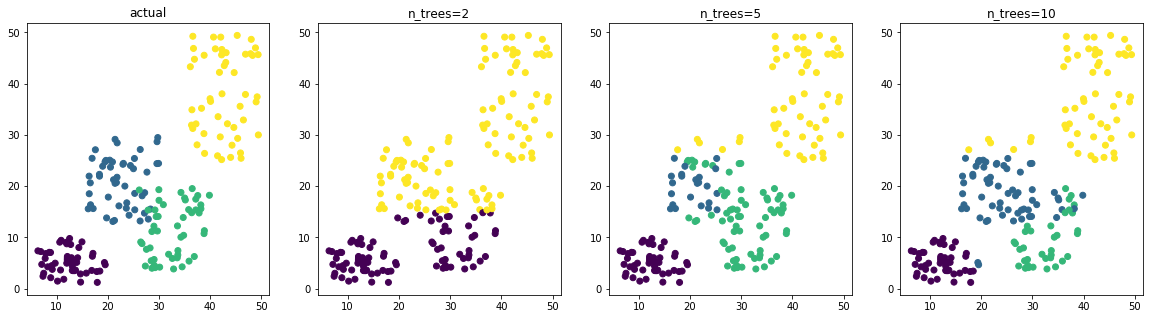

In [37]:
rf1 = RandomForestClassifier(max_depth=1, n_trees=2, random_state=2019)
rf1.fit(x_train_clf, y_train_clf)
rf2 = RandomForestClassifier(max_depth=1, n_trees=20, random_state=2019)
rf2.fit(x_train_clf, y_train_clf)
rf3 = RandomForestClassifier(max_depth=1, n_trees=200, random_state=2019)
rf3.fit(x_train_clf, y_train_clf)
plt.figure(figsize=(20,5))
plt.subplot(141)
plt.scatter(x1, x2, c=c)
plt.title('actual')
plt.subplot(142)
plt.scatter(classification_data[:,0], classification_data[:,1], c=rf1.predict(classification_data))
plt.title('n_trees=2')
plt.subplot(143)
plt.scatter(classification_data[:,0], classification_data[:,1], c=rf2.predict(classification_data))
plt.title('n_trees=5')
plt.subplot(144)
plt.scatter(classification_data[:,0], classification_data[:,1], c=rf3.predict(classification_data))
plt.title('n_trees=10')
plt.show()

## Implement a predict method for RandomForestRegressor (Score: 1)


your score will be based on how you implement the predict itself

In [38]:
class RandomForestRegressor(RandomForest):
    def __init__(self, *args, **kwargs):
        super().__init__(DecisionTreeRegressor, *args, **kwargs)
            
    def predict(self, X):
        # YOUR CODE HERE
        pred_list = []
        for selected_feat_idx,tr in zip(self.used_columns,self.trees):
            selected_data = []
            for feat_idx in selected_feat_idx:
                selected_data.append(X[:,feat_idx])
            selected_data = np.array(selected_data)
            selected_data = np.vstack(selected_data).T
            pred = tr.predict(selected_data) #pred berisi list of prediction semua dataset dalam 1 tree
            pred_list.append(pred)
            
        pred_list = np.array(pred_list)
        pred_list = np.vstack(pred_list).T #ini berisi list of prediction yang masing2 baris berisi hasil prediksi 1 datapoint dari versi semua tree
        
        pred_res = []
        for preds in pred_list:
            pred_res.append(np.mean(preds))
            
        return pred_res

In [39]:
rf = RandomForestRegressor(random_state=42)

c:\users\alif\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\alif\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
c:\users\alif\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


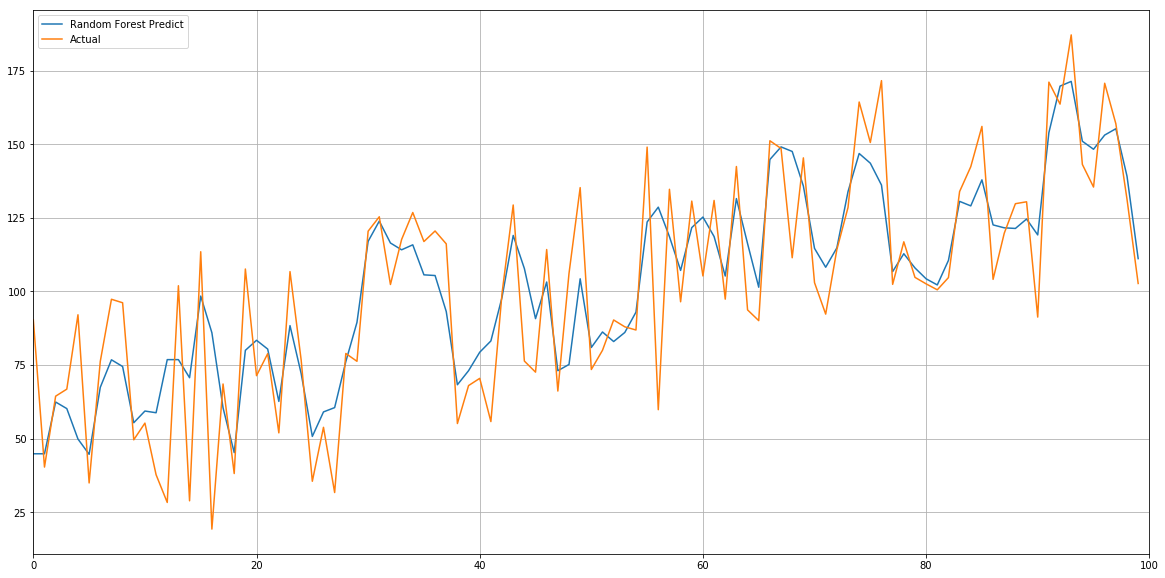

In [40]:
rf.fit(x_train_reg.reshape(-1,1), y_train_reg)
plt.figure(figsize=(20,10))
plt.plot(regression_data, rf.predict(regression_data.reshape(-1,1)), regression_data, regression_label)
plt.xlim(0,100)
plt.grid()
plt.legend(['Random Forest Predict', 'Actual'], loc='best')

## Implement a Gradient Boosted Tree For Regression

### use squared loss divided by 2 as loss function for GBDT

$$L(y^{true}, y^{pred}) = \frac{1}{2} (y^{true} - y^{pred})^2 $$

your score mostly will be based on the correctness of your implementation on both fit and predict method

In [41]:
class GradientBoostedTreeRegressor:
    def __init__(self, model_used, learning_rate=1e-1, n_trees=10, max_depth=None, min_samples_split=2):
        self.model_used = model_used if model_used is not None else DecisionTreeRegressor
        self.n_trees = n_trees
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []
        self.initial_prediction = None
        
    def fit(self, X, y):
        #membuat tree pertama
        self.initial_prediction = self.model_used(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
        self.initial_prediction.fit(X,y)
        
        pred = np.array(self.initial_prediction.predict(X))
        
        #membuat nilai prediksi awal
        y_pos = pred
        for i in range(self.n_trees):
            residual = y-y_pos
            tree = self.model_used(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X,residual)
            
            #membuat tree kedua sampai seterusnya
            self.trees.append(tree)
            
            pred = np.array(tree.predict(X))
            
            #menambahkan unsur 'additive' dalam model supaya lebih akurat
            y_pos += self.learning_rate*pred

    def predict(self, X):
        pred_res = np.array(self.initial_prediction.predict(X))
        
        #looping untuk membuat hasil prediksi berdasarkan hasil operasi 'additive' dari semua tree termasuk initial tree
        for tr in self.trees:
            pred_res += self.learning_rate*np.array(tr.predict(X))
        
        return pred_res

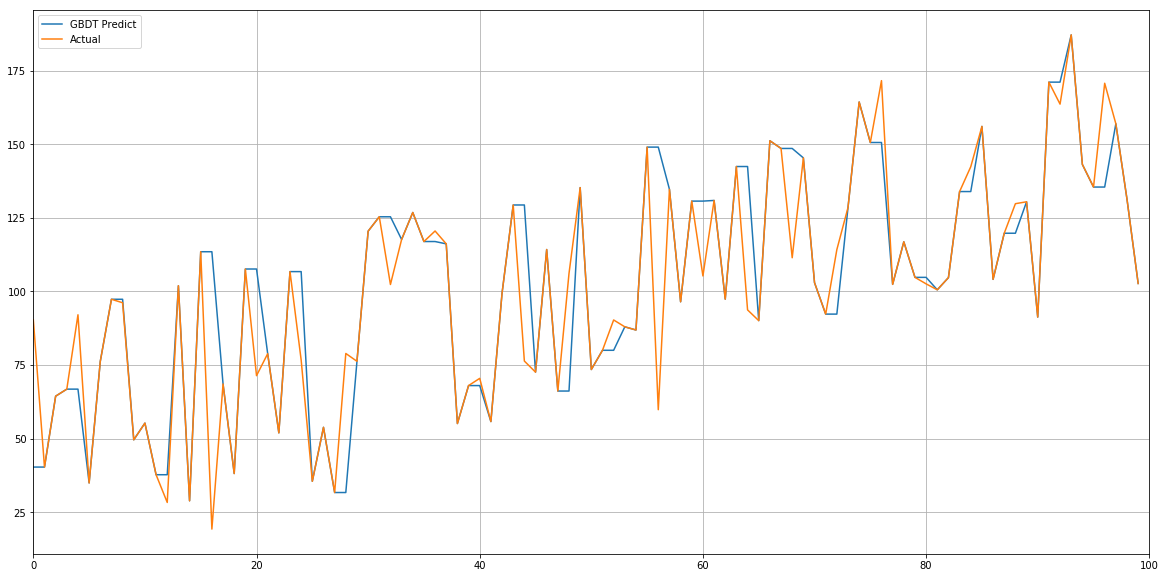

In [42]:
gbdt = GradientBoostedTreeRegressor(DecisionTreeRegressor, n_trees=50)
gbdt.fit(x_train_reg.reshape(-1,1), y_train_reg)
plt.figure(figsize=(20,10))
plt.plot(regression_data, gbdt.predict(regression_data.reshape(-1,1)), regression_data, regression_label)
plt.xlim(0,100)
plt.grid()
plt.legend(['GBDT Predict', 'Actual'], loc='best')
plt.show()

#### if implemented correctly you should see that your gbdt almost fitted perfectly

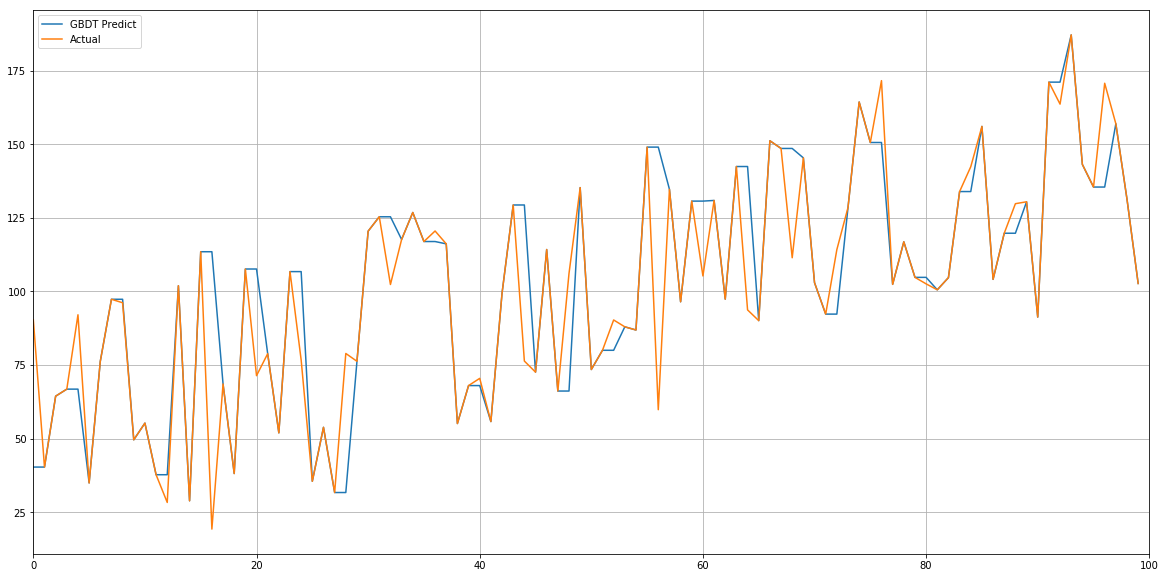

In [43]:
gbdt = GradientBoostedTreeRegressor(DecisionTreeRegressor, n_trees=1000)
gbdt.fit(x_train_reg.reshape(-1,1), y_train_reg)
plt.figure(figsize=(20,10))
plt.plot(regression_data, gbdt.predict(regression_data.reshape(-1,1)), regression_data, regression_label)
plt.xlim(0,100)
plt.grid()
plt.legend(['GBDT Predict', 'Actual'], loc='best')
plt.show()

# Essay Question (you can answer either in Bahasa Indonesia/English)

### Explain the differences of RF and GBDT in term of performance and how they works (score:1)

you are allowed to add visualization and or code snippet for your answer

## Dalam hal cara kerja :
1. Random Forest bekerja dengan cara membuat beberapa decision tree yang akan di-train dengan subset fitur dan dataset yang dipilih secara random. Prediksi dibuat dengan cara menggabungkan beberapa decision tree tsb.

2. Gradient Boosting Decision Tree bekerja dengan cara membuat beberapa decision tree secara sequential untuk mengkoreksi error dari prediksi sebelumnya.

## Dalam hal performance :
1. Random Forrest merupakan ensemble tree yang menggunakan bagging. Bagging bisa mengurangi variance, tetapi meningkatkan resiko bias (underfitting)

2. Gradient Boosting Decision Tree merupakan ensemble tree yang menggunakan teknik gradient boosting. Boosting bisa mengurangi bias, tetapi variance nya bisa meningkat (overfitting)

### when will you choose RF over GBDT, and when will you choose GBDT over RF? why? (score:1)

you are allowed to add visualization and or code snippet for your answer

Jika model decision tree yang dihasilkan mudah overfit, saya akan mencoba random forest. Apabila model decicsion tree nya underfit, saya akan mencoba gradient boosting decision tree karena bisa mengurangi bias. Di mayoritas kasus, saya akan mencoba keduanya dan melihat bagaimana hasilnya, lalu mengevaluasi mana yang lebih baik.

# Optional (No Score)

In [22]:
# give us your feedback of your experience on taking this test here
FEEDBACK = ""